In [17]:
#先把一些会用到的库进行导入
#这些库大家都比较熟悉了
#就不一一介绍了
from time import time
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#创建一个空列表，用来存储正面情绪的语料
pos_corpus = []
#打开positive.txt文件
with open('positive.txt') as f:
    #设置一个for循环
    for sent in f:
        #将文件中的文本每行为一个元素，添加到刚创建的空列表中
        pos_corpus.append(sent.replace('\n', ''))
#检查列表中的元素数量
len(pos_corpus)

4607

In [19]:
#可以用下面的方法检查一下列表的前5条
pos_corpus[:5]

['买入 长期 持有 沃森 生物 19条 简短 想法',
 '利好 出 还 涨',
 '线 战士 持 全安 牌 伟哥 火爆 进货 深交所 9月 17日 暂停 etf 融资 买入 etf 融资 余额 已 达到 证券 上市 流通 市值 每个 男人 都 一颗 王全安 心 王 后 深 男哥 私募 火爆 大战 伟哥 股 王全安 时代 召唤',
 '浙江 冬日 彻底 破位',
 '达安 基因 该涨']

In [20]:
#创建一个空列表，用来存储负面情绪的语料
neg_corpus = []
#打开negtive.txt文件
with open('negtive.txt') as f:
    #设置一个for循环
    for sent in f:
        #将文件中的文本每行为一个元素，添加到刚创建的空列表中
        neg_corpus.append(sent.replace('\n',''))
#检查列表中的元素数量
len(neg_corpus)

4607

In [21]:
#检查一下列表的前5条
neg_corpus[:5]

['此股 垃圾 买 上套 nndnull 整个 上午 大 单 都 抛 基本上 跑 跑掉 下午 猛冲',
 '变绿',
 '明天 开盘 清仓 卖光 一文不值 弄 虚 造假 实际 巨亏 国农 最 明智 最 理智 决定',
 '资金 已经 出逃 融券 大胆 做空 跳水 走为上着 已 清仓 希望 18块 接回 今天 全部 卖 出 清仓 完 明天 大跌 清仓 坐等 3个 跌停 后 进货',
 '鬼 弄 金融 SB 顶 老贴 不累']

In [22]:
#将正面情绪列表转化为DataFrame
#列命名为text
pos_df = pd.DataFrame(pos_corpus, columns = ['text'])
#创建一个新的字段，命名为polarity，正面情绪语料全部标“1”
pos_df['polarity'] = 1
#检查是否成功
pos_df.head()

,text,polarity
0,买入 长期 持有 沃森 生物 19条 简短 想法,1
1,利好 出 还 涨,1
2,线 战士 持 全安 牌 伟哥 火爆 进货 深交所 9月 17日 暂停 etf 融资 买入 e...,1
3,浙江 冬日 彻底 破位,1
4,达安 基因 该涨,1


In [23]:
#将正面情绪列表转化为DataFrame
#列命名为text
neg_df = pd.DataFrame(neg_corpus, columns = ['text'])
#创建一个新的字段，命名为polarity，正面情绪语料全部标“0”
neg_df['polarity'] = 0
#检查是否成功
neg_df.head()

,text,polarity
0,此股 垃圾 买 上套 nndnull 整个 上午 大 单 都 抛 基本上 跑 跑掉 下午 猛冲,0
1,变绿,0
2,明天 开盘 清仓 卖光 一文不值 弄 虚 造假 实际 巨亏 国农 最 明智 最 理智 决定,0
3,资金 已经 出逃 融券 大胆 做空 跳水 走为上着 已 清仓 希望 18块 接回 今天 全部...,0
4,鬼 弄 金融 SB 顶 老贴 不累,0


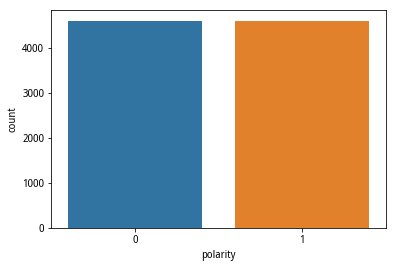

In [24]:
#用pandas的concat方法就可以合并两个DataFrame
#这里还要把原来的index去掉，并重设一个新的index
df = pd.concat([pos_df, neg_df]).reset_index(drop=True)
#为了查看是否合并成功，我们可以用seaborn的计数图来看下
#标签0和标签1的数量
sns.countplot(df['polarity'])
#显示图像
plt.show()

In [25]:
#使用数据集中的text作为特征
X = df['text']
#polarity作为标签
y = df['polarity']
#创建一个TfidfVectorizer的实例
vectorizer = TfidfVectorizer()
#使用Tfidf将文本转化为向量
X = vectorizer.fit_transform(X)
#看看特征长什么样子
X

<9214x14503 sparse matrix of type '<class 'numpy.float64'>'
	with 56565 stored elements in Compressed Sparse Row format>

In [26]:
#将数据集拆分为训练集和验证集
#这里固定一下random_state为30
#便于复现
X_train, X_test, y_train, y_test =\
train_test_split(X,y,random_state = 30)
#可以检查一下拆分
X_train.shape

(6910, 14503)

In [39]:
#导入scikit-learn中的朴素贝叶斯
from sklearn import naive_bayes
#创建一个多项式朴素贝叶斯分类器
clf = naive_bayes.MultinomialNB()
#使用训练集训练模型
clf.fit(X_train, y_train)
#检查一下模型在验证集中的准确率
print('模型在验证集中的准确率为：%.2f'%(clf.score(X_test, y_test)))

模型在验证集中的准确率为：0.86


In [49]:
#我们抽取数据集中序号为5127的数据来看一下
df.iloc[5127]

text        周二 跌停
polarity        0
Name: 5127, dtype: object

In [50]:
#使用模型对矩阵中序号为5127的数据作出预测
predict = clf.predict(X[5127])[0]
#如果预测值为1
if predict == 1:
    #给出买入建议
    print('快点买入')
#否则给出卖出建议
else:
    print('赶快清仓')

赶快清仓
